## CONTEXT :

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)

Intuition (N) – Sensing (S)

Thinking (T) – Feeling (F)

Judging (J) – Perceiving (P)

The Myers–Briggs Type Indicator (MBTI) is a kind of psychological classification about humans experience using four principal psychological functions, sensation, intuition, feeling, and thinking.

So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

## CONTENT :
This dataset contains over 8600 rows of data, on each row is a person’s:

=> Type (This persons 4 letter MBTI code/type)

=>A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

### Libraries Used

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
from PIL import Image
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import regex as re
import string

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score

import pickle

import tweepy

### Taking a look at the dataset

In [2]:
df = pd.read_csv('mbti_1.csv')
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [3]:
df.shape

(8675, 2)

In [4]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [5]:
df.nunique()

type       16
posts    8675
dtype: int64

In [6]:
df.isna().sum()

type     0
posts    0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Exploratory Data Analysis

<AxesSubplot:title={'center':'Number of Posts per Personality type'}, xlabel='type'>

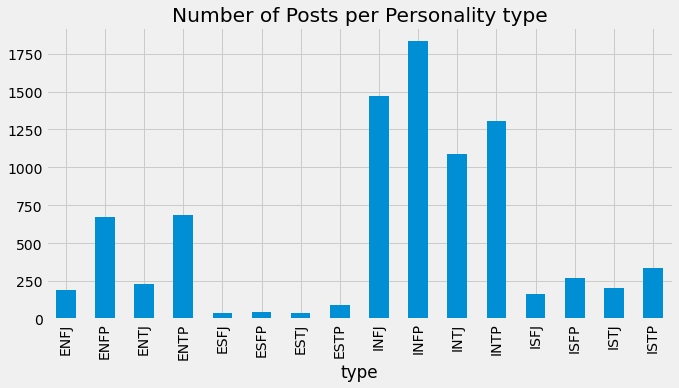

In [8]:
plt.figure(figsize=(10,5))
df.groupby('type').count()['posts'].plot(kind='bar',title="Number of Posts per Personality type")

In [9]:
px.pie(df,names='type',title='Personality type',hole=0.2)

### Data Cleaning

In [10]:
str_punc = string.punctuation

url_regex = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""

In [11]:
def clean_text(df):
    df_length = []
    cleaned_text = []
    for text in df.posts:
        text = text.lower()
        
        text = re.sub('http.*?([ ]|\|\|\||$)', ' ', text)
    
        text = re.sub(url_regex, ' ', text)
        
        text = re.sub('['+re.escape(str_punc)+']'," ",  text)
    
        text = re.sub('(\[|\()*\d+(\]|\))*', ' ', text)
    
        # Remove string marks
        text = re.sub('[’‘“\.”…–]', '', text)
        text = re.sub('[^(\w|\s)]', '', text)
        text = re.sub('(gt|lt)', '', text)
        
        df_length.append(len(text.split()))
        cleaned_text.append(text)
    return cleaned_text
df.posts = clean_text(df)
df.head()

type                                              posts
0  INFJ     enfp and intj moments    sportscenter not t...
1  ENTP   i m finding the lack of me in these posts ver...
2  INTP   good one           of course  to which i say ...
3  INTJ   dear intp    i enjoyed our conversation the o...
4  ENTJ   you re fired    that s another silly misconce...

#### Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()

for i in range(len(df['posts'])):    
    df['posts'][i] = nltk.word_tokenize(df['posts'][i])

for i in range(len(df['posts'])):
    df['posts'][i] = [lemmatizer.lemmatize(word) for word in df['posts'][i]]

df.head()

type                                              posts
0  INFJ  [enfp, and, intj, moment, sportscenter, not, t...
1  ENTP  [i, m, finding, the, lack, of, me, in, these, ...
2  INTP  [good, one, of, course, to, which, i, say, i, ...
3  INTJ  [dear, intp, i, enjoyed, our, conversation, th...
4  ENTJ  [you, re, fired, that, s, another, silly, misc...

In [13]:
for i in range(len(df['posts'])):    
    df['posts'][i] = ' '.join(df['posts'][i])

df.head()

type                                              posts
0  INFJ  enfp and intj moment sportscenter not top ten ...
1  ENTP  i m finding the lack of me in these post very ...
2  INTP  good one of course to which i say i know that ...
3  INTJ  dear intp i enjoyed our conversation the other...
4  ENTJ  you re fired that s another silly misconceptio...

#### Removing Stopwords

In [14]:
stop_words = set(stopwords.words('english')) 

df['tweet'] = df['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
del df['posts']
df.head()

type                                              tweet
0  INFJ  enfp intj moment sportscenter top ten play pra...
1  ENTP  finding lack post alarming sex boring position...
2  INTP  good one course say know blessing curse doe ab...
3  INTJ  dear intp enjoyed conversation day esoteric ga...
4  ENTJ  fired another silly misconception approaching ...

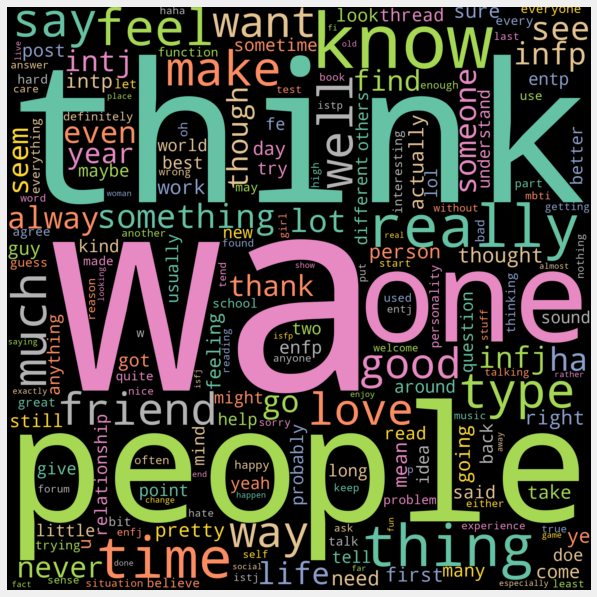

In [15]:
text = " ".join(review for review in df.tweet.astype(str))

wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Label Encoding

In [16]:
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['type'].value_counts()

9     1832
8     1470
11    1304
10    1091
3      685
1      675
15     337
13     271
2      231
14     205
0      190
12     166
7       89
5       48
4       42
6       39
Name: type, dtype: int64

0 = ENFJ

1 = ENFP

2 = ENTJ

3 = ENTP

4 = ESFJ

5 = ESFP

6 = ESTJ

7 = ESTP

8 = INFJ

9 = INFP

10 = INTJ

11 = INTP

12 = ISFJ

13 = ISFP

14 = ISTJ

15 = ISTP

### Processing

In [17]:
Tfidf = TfidfVectorizer(max_features=1000).fit(df['tweet'])

X = Tfidf.transform(df['tweet'])
y = df['type']

X.shape

(8675, 1000)

In [18]:
with open('Tfidf.pk', 'wb') as fin:
    pickle.dump(Tfidf, fin)
print('tfidf weights saved')

tfidf weights saved


In [19]:
with open('Tfidf.pk','rb') as fin:
    tfidf_1=pickle.load(fin)
print('tfidf loaded')

tfidf loaded


### Train-Test split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
X_train.shape , y_train.shape

((6940, 1000), (6940,))

In [22]:
X_test.shape , y_test.shape

((1735, 1000), (1735,))

### Training Model

In [23]:
logreg = LogisticRegression(random_state=1,solver='newton-cg',max_iter=1000,class_weight={0:7,1:2.5,2:6,3:2.5,4:10,5:10,6:10,7:10,8:1,9:1,10:1.5,11:1,12:8,13:6,14:7,15:5})
logreg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 7, 1: 2.5, 2: 6, 3: 2.5, 4: 10, 5: 10,
                                 6: 10, 7: 10, 8: 1, 9: 1, 10: 1.5, 11: 1,
                                 12: 8, 13: 6, 14: 7, 15: 5},
                   max_iter=1000, random_state=1, solver='newton-cg')

In [24]:
logreg_pred = logreg.predict(X_test)

In [25]:
print(metrics.classification_report(y_test,logreg_pred))
print(accuracy_score(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        41
           1       0.64      0.68      0.66       125
           2       0.50      0.66      0.57        44
           3       0.57      0.65      0.61       135
           4       0.33      0.29      0.31         7
           5       0.00      0.00      0.00         8
           6       0.57      0.57      0.57         7
           7       0.70      0.47      0.56        15
           8       0.76      0.56      0.64       288
           9       0.74      0.78      0.76       370
          10       0.61      0.68      0.65       193
          11       0.82      0.69      0.75       293
          12       0.77      0.60      0.68        45
          13       0.49      0.62      0.55        53
          14       0.53      0.61      0.57        44
          15       0.48      0.70      0.57        67

    accuracy                           0.67      1735
   macro avg       0.56   

In [26]:
pickle.dump(logreg, open('model', 'wb'))
print('model saved!')

model saved!


In [27]:
loaded_model = pickle.load(open('model', 'rb'))
print('model loaded')

model loaded


### Creating a Testing dataframe

In [28]:
#Twitter Credentials
consumer_key = 'twitter_consumer_key'
consumer_secret = 'twitter_consumer_secret'

access_token = 'twitter_access_token'
access_token_secret = 'twitter_access_token_secret'

In [29]:
#Twitter Authentication
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

authenticate.set_access_token(access_token, access_token_secret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

### Extracting Tweets

In [30]:
posts = api.user_timeline(screen_name='BarackObama', 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

print("Barack Obama's five most recent tweets: \n")

i = 1
for tweet in posts[0:5]:
    print(str(i) +') ' + tweet.full_text + '/n')
    i = i + 1

Barack Obama's five most recent tweets: 

1) As the first woman to serve as America’s top diplomat, Madeleine Albright was a champion for democratic values. Michelle and I send our thoughts to the Albright family and everyone who knew and served with a truly remarkable woman. https://t.co/8jj3GYZXbB/n
2) The other day, I called up DonnaMarie, Steve, and Amy to hear how the Affordable Care Act changed their lives and thank them for the work they’re doing with @ProtectOurCare to protect it.

I hope you'll watch and share your own story: https://t.co/DhAQWzxCYq/n
3) .@POTUS’s American Rescue Plan helped strengthen the Affordable Care Act by lowering costs and encouraging a record 14.5 million people to sign up for coverage in 2022. 

We'll keep working to improve the ACA until every American has access to quality, affordable health coverage./n
4) During the pandemic, the Affordable Care Act helped make vaccines and COVID-19 tests available for free, covered emergency hospitalizations, and

In [31]:
data = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweet'])
data.head()

Tweet
0  As the first woman to serve as America’s top d...
1  The other day, I called up DonnaMarie, Steve, ...
2  .@POTUS’s American Rescue Plan helped strength...
3  During the pandemic, the Affordable Care Act h...
4  12 years ago today, I signed the Affordable Ca...

In [32]:
data.shape

(192, 1)

### Test Data cleansing

In [33]:
def Clean_Text(text):
    text = text.lower()
    
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    
    text = re.sub("[^a-z0-9]"," ", text)
    
    return text

data['Tweet'] = data['Tweet'].apply(Clean_Text)
data.head()

Tweet
0  as the first woman to serve as america s top d...
1  the other day  i called up donnamarie  steve  ...
2    s american rescue plan helped strengthen the...
3  during the pandemic  the affordable care act h...
4  12 years ago today  i signed the affordable ca...

#### Lemmatization

In [34]:
for i in range(len(data['Tweet'])):    
    data['Tweet'][i] = nltk.word_tokenize(data['Tweet'][i])

for i in range(len(data['Tweet'])):
    data['Tweet'][i] = [lemmatizer.lemmatize(word) for word in data['Tweet'][i]]

data.head()

Tweet
0  [a, the, first, woman, to, serve, a, america, ...
1  [the, other, day, i, called, up, donnamarie, s...
2  [s, american, rescue, plan, helped, strengthen...
3  [during, the, pandemic, the, affordable, care,...
4  [12, year, ago, today, i, signed, the, afforda...

In [35]:
for i in range(len(data['Tweet'])):    
    data['Tweet'][i] = ' '.join(data['Tweet'][i])

data.head()

Tweet
0  a the first woman to serve a america s top dip...
1  the other day i called up donnamarie steve and...
2  s american rescue plan helped strengthen the a...
3  during the pandemic the affordable care act he...
4  12 year ago today i signed the affordable care...

#### Removing Stopwords

In [36]:
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.head()

Tweet
0  first woman serve america top diplomat madelei...
1  day called donnamarie steve amy hear affordabl...
2  american rescue plan helped strengthen afforda...
3  pandemic affordable care act helped make vacci...
4  12 year ago today signed affordable care act l...

### User's WordCloud

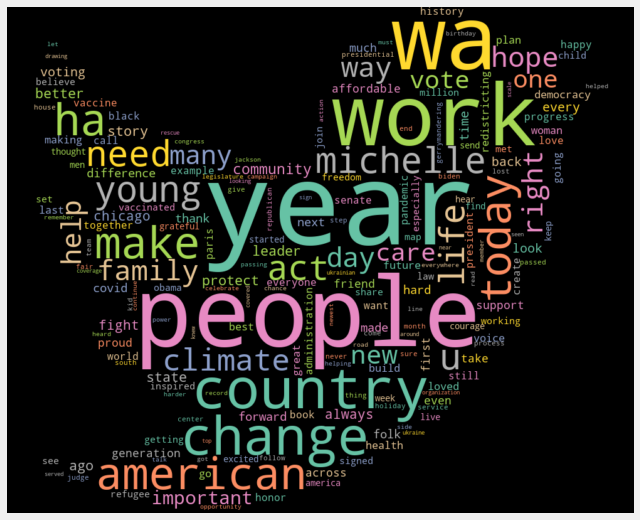

In [37]:
tweet_text = " ".join(review for review in data.Tweet.astype(str))

twitter_mask = np.array(Image.open('twitter_mask.png'))

wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, mask=twitter_mask).generate(tweet_text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Processing Test Data

In [38]:
XX = Tfidf.transform(data['Tweet'])
XX.shape

(192, 1000)

### Testing Model

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1,solver='newton-cg',max_iter=1000,class_weight={0:7,1:2.5,2:6,3:2.5,4:10,5:10,6:10,7:10,8:1,9:1,10:1.5,11:1,12:8,13:6,14:7,15:5})
logreg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 7, 1: 2.5, 2: 6, 3: 2.5, 4: 10, 5: 10,
                                 6: 10, 7: 10, 8: 1, 9: 1, 10: 1.5, 11: 1,
                                 12: 8, 13: 6, 14: 7, 15: 5},
                   max_iter=1000, random_state=1, solver='newton-cg')

In [40]:
logreg_pred = logreg.predict(XX)

In [41]:
np.argmax(logreg_pred)

7

0 = ENFJ     ,       1 = ENFP      ,      2 = ENTJ      ,      3 = ENTP

4 = ESFJ     ,       5 = ESFP      ,      6 = ESTJ      ,      7 = ESTP

8 = INFJ     ,       9 = INFP      ,     10 = INTJ      ,     11 = INTP

12 = ISFJ    ,      13 = ISFP      ,     14 = ISTJ      ,     15 = ISTP